In [1]:
# © 2023, NTNU
# Author: John Martin Kleven Godø <john.martin.godo@ntnu.no; john.martin.kleven.godo@gmail.com>
# This code is licenced under EUROPEAN UNION PUBLIC LICENCE v. 1.2

# Test for the data_extraction.DataExtractor class

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import data_extraction as data_extraction
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
line_width = 2.0
font_size = 20
label_font_size = 20
figure_size = (7, 5)

/home/johnmago/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Input

Input in the terms of files containing arrays of X, Y, Z data. \
p1_fnm: X data file\
p2_fnm: Y data file\
p3_fnm: Z data file

In [2]:
# Example data
root_dir = './data/hydrofoil_system_weight/' # Root dir for data
p1_fnm = '20240116_l_design_array.npy' #Parameter 1: Design lift
p2_fnm = '20240116_u_design_array.npy' #Parameter 2: Design speed
d_fnm = '20240116_tot_weight_post_buoyancy.npy' # Data

## Read and plot

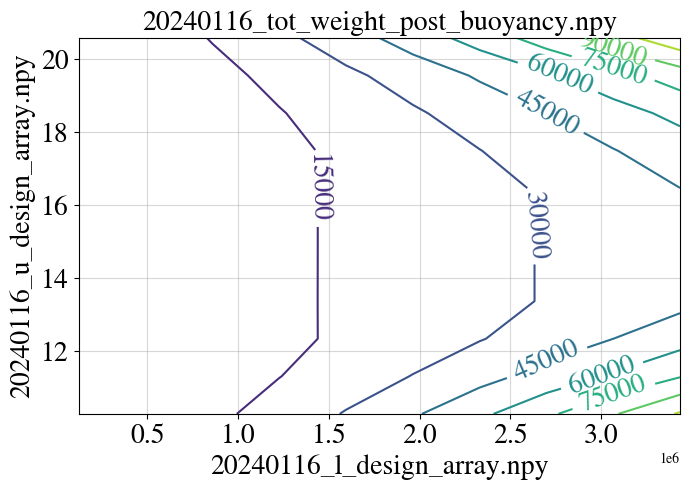

In [3]:
de = data_extraction.DataExtractor(root_dir, p1_fnm, p2_fnm, d_fnm)
de.plot_data()

# Data interpolation

In [4]:
n_p1_vals = 100
p1_example_vals = np.linspace(np.amin(de.p1_array), np.amax(de.p1_array), 
                              num = n_p1_vals)
p2_example_val = 16.0

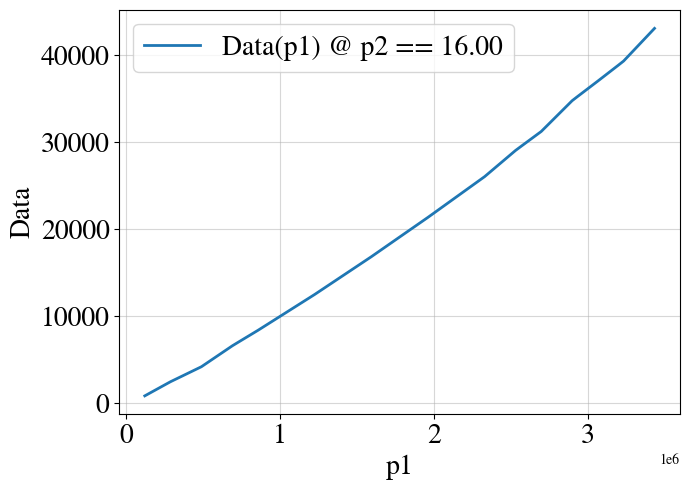

In [5]:
de.create_interpolator()
d_interpolated = de.get_interpolated_points(p1_example_vals, p2_example_val)


fig, ax = plt.subplots(1, 1, figsize = figure_size)
ax.plot(p1_example_vals, d_interpolated, linewidth = line_width, 
        label = 'Data(p1) @ p2 == {:.2f}'.format(p2_example_val))
ax.legend(fontsize = font_size)
ax.tick_params(axis='both', which='major', labelsize=label_font_size)
ax.grid(alpha = 0.5)
ax.set_xlabel('p1', fontsize = font_size)
ax.set_ylabel('Data', fontsize = font_size)
fig.tight_layout()